# Import and process the data

In [17]:
# import libraries
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import MinMaxScaler
# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
X = iris.data.features
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = iris.data.targets

In [18]:
y["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
y = y.copy()
y["class"] = y["class"].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
y

/tmp/ipython-input-497275139.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y["class"] = y["class"].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})


,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [20]:
df = X.copy()
df["species"] = y

# Exploratory Data Analysis
---

In [21]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,sepal length,sepal width,petal length,petal width,species
sepal length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [22]:
# Convert data into tensors

# convert to a pytorch tensor
data = torch.tensor(X.values).float()
labels = torch.tensor(y.values).float()
labels = labels.view(-1, 1)
labels.shape

torch.Size([150, 1])

In [23]:
labels=labels.squeeze().long()

# Create the ANN model

In [24]:
# model architecture
ANN_model = nn.Sequential(
    nn.Linear(4,64),   # input layer
    nn.ReLU(),         # activation
    nn.Linear(64,64),  # hidden layer
    nn.ReLU(),         # activation
    nn.Linear(64,64),  # hidden layer
    nn.ReLU(),         # activation
    nn.Linear(64,3),   # output layer
      )

# loss function
lossfunc = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANN_model.parameters(),lr=.01)

# Train the model

In [25]:
epochs = 1000

# initialize losses
losses = torch.zeros(epochs)
Acc = []

# loop over epochs
for i in range(epochs):

  # forward pass
  pred = ANN_model(data)

  # compute loss
  loss = lossfunc(pred,labels)
  losses[i] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(pred,axis=1) == labels # booleans (false/true)
  matchesNumeric = matches.float()              # convert to numbers (0/1)
  accuracyPct = 100*torch.mean(matchesNumeric)  # average and x100
  Acc.append( accuracyPct )              # add to list of accuracies



# final forward pass
predictions = ANN_model(data)

predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

In [26]:
pred

tensor([[ 3.5193e+00,  2.3063e-01, -3.7497e+00],
        [ 3.1421e+00,  2.8659e-01, -3.4196e+00],
        [ 3.4277e+00,  2.3185e-01, -3.6604e+00],
        [ 3.3519e+00,  2.4702e-01, -3.5993e+00],
        [ 3.6035e+00,  2.2426e-01, -3.8288e+00],
        [ 3.4210e+00,  2.9368e-01, -3.7115e+00],
        [ 3.5266e+00,  2.3009e-01, -3.7615e+00],
        [ 3.4651e+00,  2.3715e-01, -3.7028e+00],
        [ 3.2723e+00,  2.4893e-01, -3.5217e+00],
        [ 3.3054e+00,  2.5464e-01, -3.5560e+00],
        [ 3.5482e+00,  2.3891e-01, -3.7853e+00],
        [ 3.5011e+00,  2.3537e-01, -3.7393e+00],
        [ 3.2848e+00,  2.4990e-01, -3.5314e+00],
        [ 3.4392e+00,  2.1833e-01, -3.6596e+00],
        [ 3.6646e+00,  2.2926e-01, -3.8879e+00],
        [ 3.7469e+00,  2.4982e-01, -3.9924e+00],
        [ 3.5950e+00,  2.3936e-01, -3.8335e+00],
        [ 3.4694e+00,  2.4069e-01, -3.7101e+00],
        [ 3.2562e+00,  3.2425e-01, -3.5738e+00],
        [ 3.6457e+00,  2.2967e-01, -3.8773e+00],
        [ 3.1474e+00

In [27]:
torch.argmax(pred,axis=1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
        2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

# Visualize the results

Final accuracy: 94.6667%


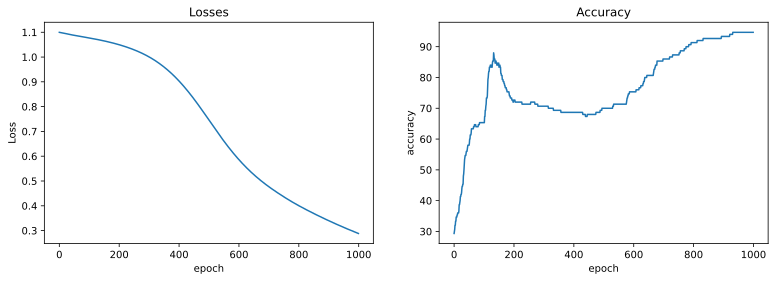

In [28]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(Acc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()
# run training again to see whether this performance is consistent

In [29]:
# confirm that all model predictions sum to 1, but only when converted to softmax
sm = nn.Softmax(1)
torch.sum(sm(pred),axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

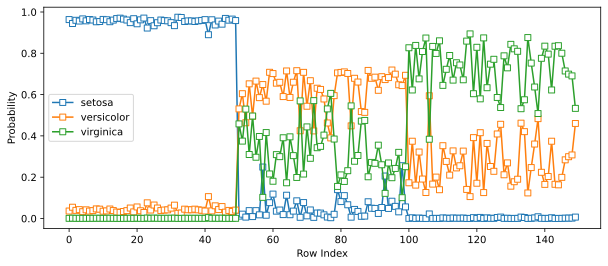

In [30]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

plt.plot(sm(pred.detach()),'s-',markerfacecolor='w')
plt.xlabel('Row Index')
plt.ylabel('Probability')
plt.legend(['setosa','versicolor','virginica'])
plt.show()

# Experiments
---

1. Decrease the number of hidden layers to 1 and compare the result with that of the original architecture.
2. Decrease the number of hidden layers to 1 but increase the number of hidden units from 16 to 32 and compare the result with that of the original architecture.
3. Increase the number of hidden layers to 4 and compare the result with that of the original architecture.
4. Increase the number of hidden layers to 4 but increase the number of hidden units from 16 to 32 and compare the result with that of the original architecture.
5. Increase the number of hidden layers to 4 but decrease the number of hidden units from 16 to 8 and compare the result with that of the original architecture.
6. Perform a learning rate experiment similar to the previous discussion, what have you discovered?

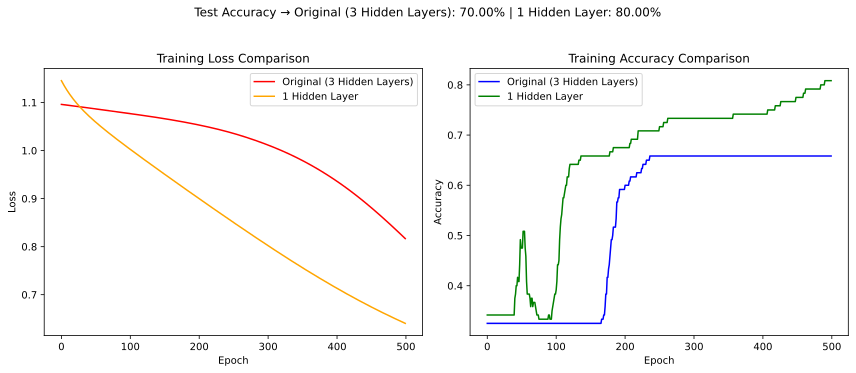

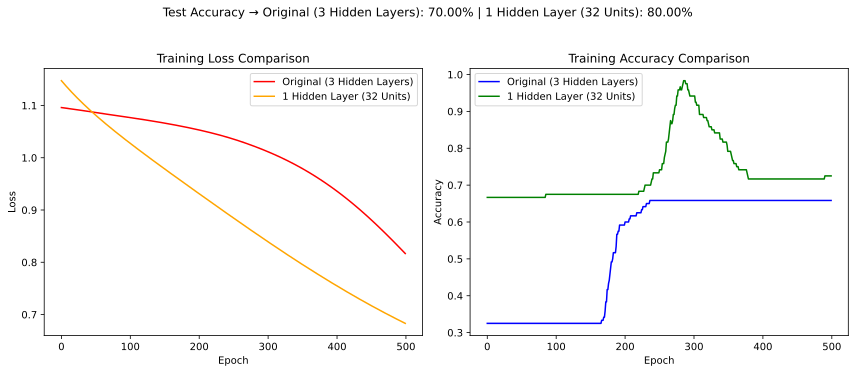

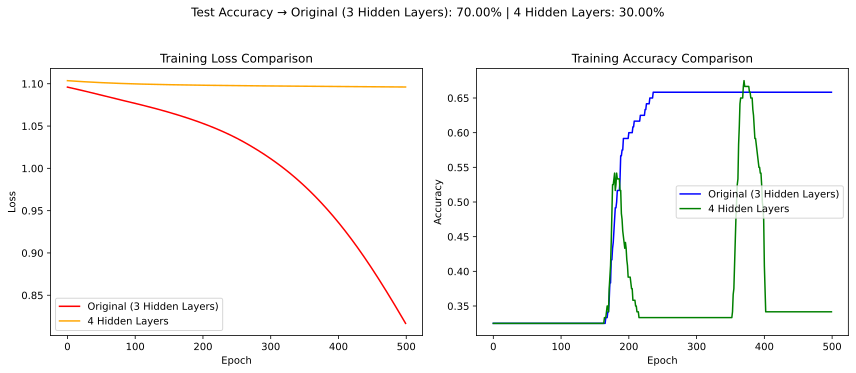

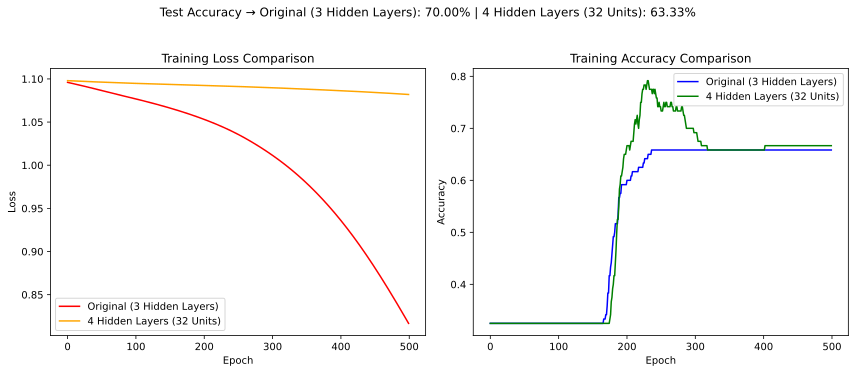

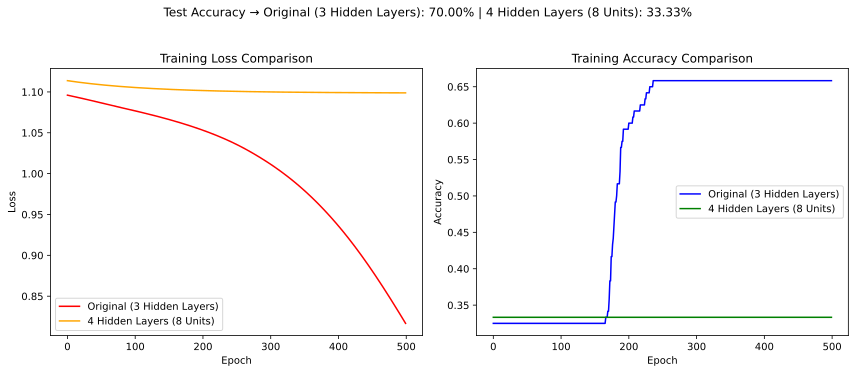

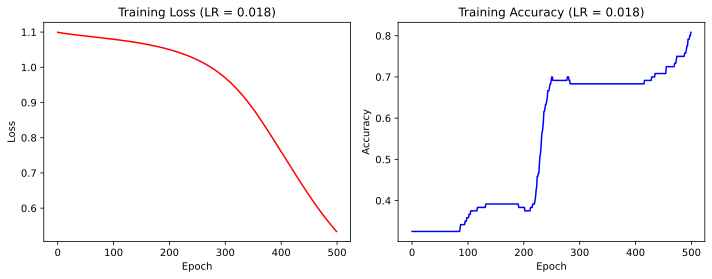

Test Accuracy with Learning Rate 0.018: 80.00%


In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------------------------
# Load and preprocess the Iris dataset
# -----------------------------------------------------------
iris = load_iris()
X = iris.data
y = iris.target

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------------------------------
# Helper Functions
# -----------------------------------------------------------
def train_model(model, lr=0.01, epochs=500):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)

    loss_list = []
    acc_list = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        loss_list.append(loss.item())

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        acc = (predicted == y_train).sum().item() / len(y_train)
        acc_list.append(acc)

    # Test accuracy
    with torch.no_grad():
        test_outputs = model(X_test)
        _, test_pred = torch.max(test_outputs, 1)
        test_acc = (test_pred == y_test).sum().item() / len(y_test)

    return loss_list, acc_list, test_acc


def plot_comparison(loss1, acc1, loss2, acc2, acc_test1, acc_test2, title1, title2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    # Loss comparison
    ax1.plot(loss1, color='red', label=title1)
    ax1.plot(loss2, color='orange', label=title2)
    ax1.set_title('Training Loss Comparison')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    # Accuracy comparison
    ax2.plot(acc1, color='blue', label=title1)
    ax2.plot(acc2, color='green', label=title2)
    ax2.set_title('Training Accuracy Comparison')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.suptitle(
        f"Test Accuracy → {title1}: {acc_test1*100:.2f}% | {title2}: {acc_test2*100:.2f}%",
        fontsize=12,
        y=1.03
    )
    plt.tight_layout()
    plt.show()


# Experiment 1: Decrease hidden layers to 1
model_original = nn.Sequential(
    nn.Linear(4,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,3)
)
loss_orig, acc_orig, test_acc_orig = train_model(model_original)

model_1hidden = nn.Sequential(
    nn.Linear(4,64),
    nn.ReLU(),
    nn.Linear(64,3)
)
loss_1, acc_1, test_acc_1 = train_model(model_1hidden)

plot_comparison(loss_orig, acc_orig, loss_1, acc_1, test_acc_orig, test_acc_1,
                "Original (3 Hidden Layers)", "1 Hidden Layer")


#Experiment 2: 1 Hidden Layer with 32 Units
model_1hidden32 = nn.Sequential(
    nn.Linear(4,32), nn.ReLU(),
    nn.Linear(32,3)
)
loss_1_32, acc_1_32, test_acc_1_32 = train_model(model_1hidden32)

plot_comparison(loss_orig, acc_orig, loss_1_32, acc_1_32, test_acc_orig, test_acc_1_32,
                "Original (3 Hidden Layers)", "1 Hidden Layer (32 Units)")


# Experiment 3: Increase hidden layers to 4
model_4hidden = nn.Sequential(
    nn.Linear(4,16), nn.ReLU(),
    nn.Linear(16,16), nn.ReLU(),
    nn.Linear(16,16), nn.ReLU(),
    nn.Linear(16,16), nn.ReLU(),
    nn.Linear(16,3)
)
loss_4, acc_4, test_acc_4 = train_model(model_4hidden)

plot_comparison(loss_orig, acc_orig, loss_4, acc_4, test_acc_orig, test_acc_4,
                "Original (3 Hidden Layers)", "4 Hidden Layers")


# Experiment 4: 4 Hidden Layers with 32 Units
model_4hidden32 = nn.Sequential(
    nn.Linear(4,32), nn.ReLU(),
    nn.Linear(32,32), nn.ReLU(),
    nn.Linear(32,32), nn.ReLU(),
    nn.Linear(32,32), nn.ReLU(),
    nn.Linear(32,3)
)
loss_4_32, acc_4_32, test_acc_4_32 = train_model(model_4hidden32)

plot_comparison(loss_orig, acc_orig, loss_4_32, acc_4_32, test_acc_orig, test_acc_4_32,
                "Original (3 Hidden Layers)", "4 Hidden Layers (32 Units)")


# Experiment 5: 4 Hidden Layers with 8 Units
model_4hidden8 = nn.Sequential(
    nn.Linear(4,8), nn.ReLU(),
    nn.Linear(8,8), nn.ReLU(),
    nn.Linear(8,8), nn.ReLU(),
    nn.Linear(8,8), nn.ReLU(),
    nn.Linear(8,3)
)
loss_4_8, acc_4_8, test_acc_4_8 = train_model(model_4hidden8)

plot_comparison(loss_orig, acc_orig, loss_4_8, acc_4_8, test_acc_orig, test_acc_4_8,
                "Original (3 Hidden Layers)", "4 Hidden Layers (8 Units)")


# Experiment 6: Learning Rate Variation
learning_rate = 0.018

model = nn.Sequential(
    nn.Linear(4,64), nn.ReLU(),
    nn.Linear(64,64), nn.ReLU(),
    nn.Linear(64,64), nn.ReLU(),
    nn.Linear(64,3)
)

loss_lr018, acc_lr018, test_acc_lr018 = train_model(model, lr=learning_rate)

# Plot results
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(loss_lr018, color='red')
plt.title('Training Loss (LR = 0.018)')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(acc_lr018, color='blue')
plt.title('Training Accuracy (LR = 0.018)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

print(f"Test Accuracy with Learning Rate 0.018: {test_acc_lr018*100:.2f}%")
